In [38]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
import pandas as pd

import code.auth_and_scrape as get_tweets
import code.preparation as prep
import code.visualization as viz

#nltk.download('vader_lexicon')
#nltk.download('punkt')

Twitter API Authentication

In [ ]:
get_tweets.authenticate(key, key_secret, access, access_secret)

Function to scrape a chosen amount of tweets with a chosen keyword and append to CSV file.

In [5]:
get_tweets.scrape_and_place()

# of Tweets added from this response:  900
# of Tweets added from this response:  900
# of Tweets added from this response:  900
# of Tweets added from this response:  900
# of Tweets added from this response:  900
# of Tweets added from this response:  900
# of Tweets added from this response:  900


In [12]:
df = pd.read_csv('data/data.csv')
df.head()

,id,created_at,language,favorites,retweets,text
0,1462933594754670600,2021-11-22 23:58:43+00:00,en,0,0,@DestinyTheGame all id like is to be at least ...
1,1462933098887266308,2021-11-22 23:56:45+00:00,en,0,0,@DestinyTheGame Can someone please explain to ...
2,1462932969086087176,2021-11-22 23:56:14+00:00,en,1,0,@techaftmidnight @GoogleStadia @DestinyTheGame...
3,1462932844418842632,2021-11-22 23:55:44+00:00,en,1,0,Going live in 5 minutes!! Let's go GOD SQUAD!!...
4,1462932760515985420,2021-11-22 23:55:24+00:00,en,0,0,"@A_dmg04 @DestinyTheGame Dear Eva, please brin..."


In [13]:
df.favorites.describe()

count    6300.000000
mean        9.520635
std        90.900910
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max      3879.000000
Name: favorites, dtype: float64

Cleaning of Tweets

In [14]:
df.text[1]

'@DestinyTheGame Can someone please explain to me why I (top 7-10%ish player) keep getting teamed with people in the… https://t.co/fREoFm7Emb'

This tweet has a ton of punctuation and it even includes a url. In order for our sentiment analyzer to read and understand this, we must remove the all of this and even lowercase every letter. Here A function has been create to do this.

In [15]:
df = prep.clean_tweets(df)

A function to create a Sentiment Analysis using TextBlob and SentimentIntensityAnalyzer.

In [16]:
df_probs = prep.create_sentiment_neu(df)

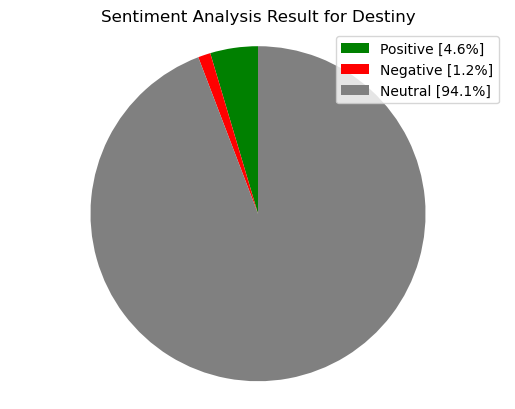

In [17]:
viz.pie_chart(df_probs)

In [18]:
df_probs = prep.create_sentiment(df)

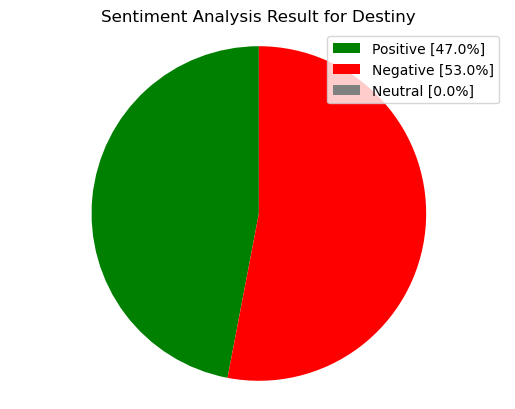

In [19]:
viz.pie_chart(df_probs)

Feature Engineering Positive & Negative Variables

In [20]:
df_pos_uncleaned = prep.create_pos_df(df, df_probs)

In [21]:
df_pos_cleaned = prep.clean_tweets(df_pos_uncleaned)
df_pos_cleaned.head()

,text,sentiment,clean_text
0,@DestinyTheGame all id like is to be at least ...,1.0,all id like is to be at least decent in cruc...
1,@DestinyTheGame Can someone please explain to ...,1.0,can someone please explain to me why i top ...
3,Going live in 5 minutes!! Let's go GOD SQUAD!!...,1.0,going live in 5 minutes let s go god squad ...
4,"@A_dmg04 @DestinyTheGame Dear Eva, please brin...",1.0,dmg04 dear eva please bring me gambit jad...
5,A PS5 would be nice https://t.co/NywWHkzJaA,1.0,a ps5 would be nice


In [22]:
df_neg_uncleaned = prep.create_neg_df(df, df_probs)
df_neg_cleaned = prep.clean_tweets(df_neg_uncleaned)

In [23]:
df_neg_cleaned.clean_text[17]

'  dear eva    bring some good looking warlocks helmets i m sick and tired of using only two'

In [24]:
df_neg_uncleaned.text.values[13]

'@cjjthedon @Xbox @DestinyTheGame I’ve bought the game every expansion from launch has been the delux edition…. I ju… https://t.co/t8TV5O3q2Y'

In [25]:
positives_and_count, pos_vec = prep.top_n_gram(df_pos_cleaned['clean_text'], (1,1), 300)

positives = [x[0] for x in positives_and_count]
top_10_pos = positives[:10]
positives_minus_top_10 = [x for x in positives if x not in top_10_pos]
print(positives_minus_top_10)

['destiny2', 'threadsoflight', 'game', 'play', 'congrats', 'thanks', 'bring', 'destinythegame', 'make', 'really', 'don', 'hope', 'great', 'time', 'nice', 'better', 'new', 'day', 'playing', 'looks', 'congratulations', 'yeah', 'bungie', 'know', 'happy', 'trials', 'help', 'awesome', 'think', 've', 'going', 'dawning', 'wish', 'year', 'fun', 'got', 'space', 'hunter', 'people', 'shader', 'look', 'best', 'd2', 'live', 'crow', 'grandma', 'free', 'let', 'need', 'amazing', 'today', 'twab', 'friends', 'll', 'guardian', 'lol', 'week', 'use', 'getting', 'god', 'cool', 'pvp', 'changes', 'work', 'come', 'double', 'amp', 'right', 'looking', 'titan', 'team', 'maybe', 'ability', 'actually', 'oh', 'win', 'vex', 'pretty', 'flawless', 'thememe', 'super', 'man', 'played', 'rewards']


In [26]:
negatives_and_count, neg_vec = prep.top_n_gram(df_neg_cleaned['clean_text'], (1,1), 300)

negatives = [x[0] for x in negatives_and_count]
top_10_neg = negatives[:10]
negatives_minus_top_10 = [x for x in negatives if x not in top_10_neg]
print(negatives_minus_top_10)

['time', 'don', 'new', 'got', 'make', 'warlock', 'destiny2art', 'twab', 'caiatl', 'titan', 'going', 'did', 'like', 've', 'light', 'thememe', 'trials', 'shit', 'day', 'getting', 'know', 'right', 'hey', 'think', 'queen', 'pvp', 'asking', 'll', 'live', 'let', 'talking', 'weapons', 'destinyfashion', 'pass', 'bad', 'crucible', 'probably', 'people', 'fucking', 'say', 'bring', 'wait', 'come', 'witch', 'destinyart', 'look', 'gonna', 'raid']


Create Feature column.

In [27]:
pos_features = [
    (prep.create_features(review, positives_minus_top_10))
    for review in df['clean_text']]

In [28]:
neg_features = [(prep.create_features(review, negatives_minus_top_10))
                for review in df['clean_text']]

In [29]:
df_feat = pd.concat([df['clean_text'], pd.DataFrame(pos_features,columns=['positive_word_count']), pd.DataFrame(neg_features,columns=['negative_word_count'])], axis=1)

In [30]:
df_feat.head()

,clean_text,positive_word_count,negative_word_count
0,all id like is to be at least decent in cruc...,0,2
1,can someone please explain to me why i top ...,2,2
2,sekiroshadowsdietwice cyberpunk2077 ...,0,0
3,going live in 5 minutes let s go god squad ...,7,4
4,dmg04 dear eva please bring me gambit jad...,2,1


Finally, train-test split

In [31]:
# Train-test split
X_train,X_test,y_train,y_test = train_test_split(df_feat, df_probs['sentiment'],random_state=1)
X_train

,clean_text,positive_word_count,negative_word_count
4319,read my mind,0,0
518,oh god please no more cookie baking please,2,0
4584,ahh thanks so much ghaul lt 3,1,0
3768,these cool down changes in combination with da...,2,0
2990,they talking about why eris had to put her r...,1,1
...,...,...,...
905,getting back into sniping slowly des...,3,2
5192,congratulations hell yeah,2,0
3980,ab you have been having problems for years...,0,1
235,dear eva could you kindly ask ada 1 to sel...,0,0


In [32]:
feat, feat_vec_train = prep.top_n_gram(X_train['clean_text'], (1,1), 100)
feat, feat_vec_test = prep.top_n_gram_test(X_test['clean_text'], X_train['clean_text'], (1,1), 100)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

#Create X_train vectorized
X_train_vec = pd.concat([X_train.drop('clean_text', axis=1), pd.DataFrame(feat_vec_train.todense())], axis=1)
X_test_vec = pd.concat([X_test.drop('clean_text', axis=1), pd.DataFrame(feat_vec_test.todense())], axis=1)

Baseline model is the majority class at 53.4% negative/neutral.

In [33]:
y_train.value_counts()[0]/y_train.shape[0]

0.5337566137566138

For sentiment analysis, the preprocessing steps determine the outcome of the model so here a simple logistic regression is fit to the train and scored on the test. The final accuracy comes out to be 78.7%. 

In [34]:
log_model = LogisticRegression()
log_model.fit(X_train_vec, y_train)
log_model.score(X_test_vec, y_test)

0.7892063492063492

In [36]:
cross_val = cross_val_score(log_model, X_test_vec, y_test).mean()
cross_val

0.7784126984126984

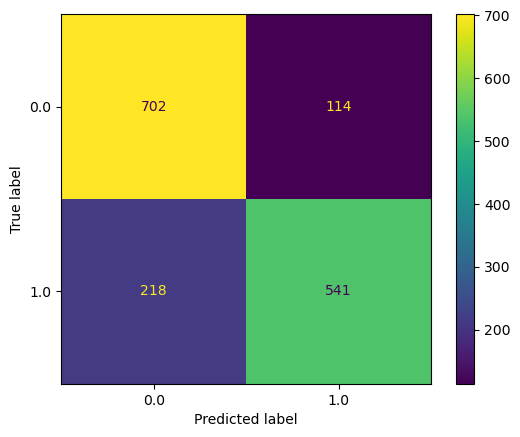

In [39]:
plot_confusion_matrix(log_model, X_test_vec, y_test);